In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
def time_converter(data, minute=False):
    x = data.split('-')
    if len(x)==1:
        d = 0
        x = x[0]
    else:
        d = int(x[0])
        x = x[1]
    h,m,s = map(int,x.split(':'))
    if minute == True:
        return (d*24 + h)*60 + m + s/60
    return ((d*24 + h)*60+m)*60+s

In [3]:
df = pd.read_excel('xnat_accre_full_stats.xlsx')

In [4]:
df.head()

,jobstartdate,jobSubmitDate,id,proctype,memused,input(MB),output(MB),walltime(min),JobID,Submit,...,ExitCode,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList
0,2018-01-01,2017-12-22,VUIISXNAT02_E226662,MaCRUISE_Parcel_v2,4631908,7.0,253.0,408.316667,23101185,2018-01-01T15:01:37,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp1044
1,2018-01-01,2017-12-22,VUIISXNAT02_E226752,MaCRUISE_Parcel_v2,4212364,5.9,198.0,238.000000,23101253,2018-01-01T16:01:34,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp201
2,2018-01-01,2017-12-22,VUIISXNAT02_E226788,MaCRUISE_Parcel_v2,4146228,5.4,198.0,236.700000,23101254,2018-01-01T16:01:34,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp202
3,2018-01-01,2017-12-22,VUIISXNAT02_E226806,MaCRUISE_Parcel_v2,4432564,7.6,220.0,287.683333,23101255,2018-01-01T16:01:34,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp205
4,2018-01-01,2017-12-22,VUIISXNAT02_E226824,MaCRUISE_Parcel_v2,3963128,6.6,158.0,154.983333,23101252,2018-01-01T16:01:34,...,00:00:00,COMPLETED,1,1,1,16000Mn,NaN,"cpu=1,mem=16000M,node=1",12:00:00,vmp211


In [5]:
df['ReqMem_num'] = pd.to_numeric(df['ReqMem'].map(lambda x: x.rstrip('MnG')))

In [6]:
df['Timelimit_num'] = df['Timelimit'].astype(str)
df['Timelimit_num'] = df.Timelimit_num.apply(time_converter)

In [7]:
df['proctype'].unique()

array(['MaCRUISE_Parcel_v2', 'FMRIQA_v4', 'MaCRUISE_v3',
       'Seeleyfmripreproc_v3', 'Multi_Atlas_v2', 'NDW_VBM_v1', 'dtiQA_v6',
       'bedpostx_v3', 'FSL_First', 'VBMQA', 'dtiQA_v2', 'Multi_Atlas',
       'fMRIQA_v2', 'fMRIQA_v3', 'MAGM_Coreg_Normalize_v2',
       'FMRI_conncalc_JS_FEPH_PWR264_v1', 'fmri_graph_JS_v1', 'dtiQA_v4',
       'Probtrackx2_v2_sevenrois', 'Probtrackx2_RAS_v2_RAS_sevenrois',
       'FTI_v1', 'dtiQA_v3', 'MaCRUISE_v2',
       'fMRI_Connectivity_PreProcess_Scan_v2', 'Bedpost_v1',
       'fMRI_Connectivity_Process_Scan_v3',
       'fMRI_Connectivity_Process_Scan_v3_ma132',
       'fMRI_Thalpartialconn_v1', 'Probtrackx2_v1',
       'Probtrackx2_RAS_v1_RAS', 'Probtrackx2_RAS_v1_NC',
       'Probtrackx2_v1_ARAS', 'Seeleyfmripreproc_v2', 'fMRIQA',
       'fMRI_Preprocess_DND', 'BrainAge_singularity_v1',
       'curve_labeling_v2', 'Dortch_Leg_v1', 'surf_quant_FS_v1',
       'Temporal_Lobe_v3', 'MAGM_Normalize_v1', 'Probtrackx_ARAS_v2',
       'Cerebellum_Segmenta

In [8]:
mem_prop = {}
mem_prop["fMRI_Connectivity_PreProcess_Scan_v2"] = False # in MB not GB

### Read the timeout log and plot timeout runs compared to application behavior

In [59]:
dataset = "VBMQA"
data = pd.Series(np.loadtxt("../workload/ACCRE/"+dataset+".out", delimiter=' '))

In [60]:
old_data = pd.read_csv("./2016_%s.csv" %(dataset))
old_data["memused"] = old_data["input(MB)"] + old_data["output"]
old_data['walltime_min'] = old_data['walltime'].astype(str)
old_data['walltime_min'] = old_data.walltime_min.apply(time_converter, minute=True)
old_data.head()

,Unnamed: 0,walltime,input(MB),output,memused,walltime_min
0,6951,00:18:39,0.0,30.0,30.0,18.650000
1,23233,00:15:15,1.3,13.0,14.3,15.250000
2,23837,00:10:39,2.3,8.5,10.8,10.650000
3,23838,00:10:36,2.3,11.0,13.3,10.600000
4,24011,00:15:53,2.6,19.0,21.6,15.883333


In [61]:
reqtime = df[df.proctype == dataset]['Timelimit_num'].unique() # in seconds
reqmem = df[df.proctype == dataset]['ReqMem_num'].unique() # in GB
df[df.proctype == dataset].head()

,jobstartdate,jobSubmitDate,id,proctype,memused,input(MB),output(MB),walltime(min),JobID,Submit,...,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,ReqMem_num,Timelimit_num
791,2018-01-06,2018-01-06,VUIISXNAT02_E233066,VBMQA,1389140,6.0,34.0,55.733333,23264341,2018-01-06T17:26:15,...,1,1,1,2Gn,NaN,"cpu=1,mem=2G,node=1",01:00:00,vmp1018,2,3600
4877,2018-01-24,2018-01-24,VUIISXNAT04_E00551,VBMQA,1366280,6.5,37.0,20.816667,24026006,2018-01-25T03:01:30,...,1,1,1,2Gn,NaN,"cpu=1,mem=2G,node=1",01:00:00,vmp1062,2,3600
5045,2018-02-08,2018-02-08,VUIISXNAT04_E04023,VBMQA,1321492,5.2,31.0,19.600000,24487007,2018-02-08T08:01:59,...,1,1,1,2Gn,NaN,"cpu=1,mem=2G,node=1",01:00:00,vmp1078,2,3600
5049,2018-02-08,2018-02-08,VUIISXNAT04_E04034,VBMQA,1377000,5.9,33.0,20.016667,24487005,2018-02-08T08:01:58,...,1,1,1,2Gn,NaN,"cpu=1,mem=2G,node=1",01:00:00,vmp1077,2,3600
5053,2018-02-08,2018-02-08,VUIISXNAT04_E04050,VBMQA,1350896,6.3,35.0,20.300000,24504820,2018-02-08T20:01:37,...,1,1,1,2Gn,NaN,"cpu=1,mem=2G,node=1",01:00:00,vmp1025,2,3600


In [62]:
dfset = df[df.proctype == dataset]
dfset = dfset[dfset['memused'].notnull()].copy()
dfset['memused'] = dfset['memused'].astype(str)

In [63]:
dfset = dfset[dfset.memused.apply(lambda x: x.isnumeric())]

In [64]:
dfset['memused'] =  pd.to_numeric(dfset['memused']) / 1024
if dataset not in mem_prop:
    reqmem = reqmem * 1024

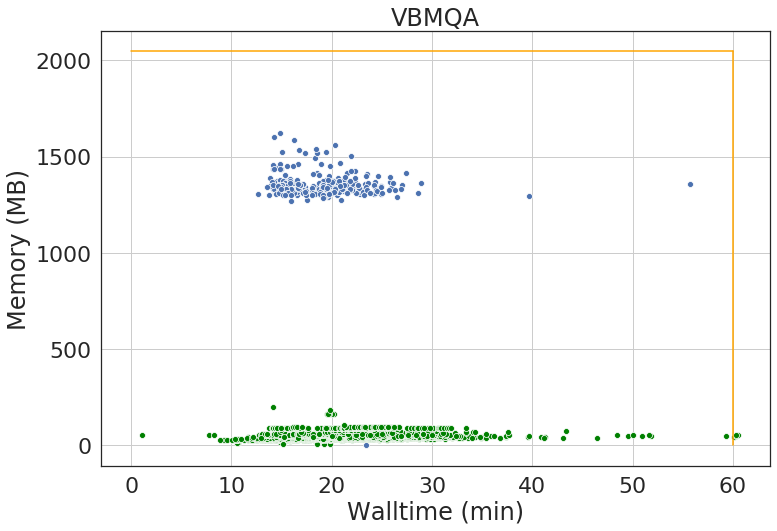

In [65]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set(font_scale=2)
sns.set_style("white")
ax = sns.scatterplot(y="memused", x="walltime(min)",
                     data=dfset)

ax = sns.scatterplot(y="memused", x="walltime_min",
                     data=old_data,
                     color = 'green')

# set the request times
for i in reqtime:
    # time in database is in min
    plt.plot([i/60, i/60], [0, max(reqmem)], color='orange')
for i in reqmem:
    plt.plot([0, max(reqtime)/60], [i, i], color='orange')

plt.grid(True)
ax.set_xlabel('Walltime (min)')
ax.set_ylabel('Memory (MB)')
ax.set_title(dataset)

plt.savefig("figures/%s.png" %(dataset))
plt.show()